In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg
from scipy import optimize
import scipy
import os
import spectrum_connectivity as sc
import spectrum_jacobia as sj
import tools
import importlib
importlib.reload(sc)
importlib.reload(tools)
import shutil
import dynamic


In [2]:
datapath = "data/Fig7/"
figpath = "figure/Fig7/"

In [4]:
paras = [[1,0,1,1.5],[0.5,0,1,1.5],[0.01,0,1,1.5],[0.01,0,1,1.1],[0.01,0,1,1.5],[0.01,0,1,1.8],[0.01,0,1,2]]
for para in paras:
    alpha,c,d,gamma=para
#     diluted = 1
#     segment=1
#     tmax = 1.5
#     dt = 0.01
#     clean_diag=False
#     gaussian=False
#     print("FAKE ALPHA = "+str(alpha/(diluted)))
#     if_circulant = True
#     tau = 0.01
#     phi = lambda x: np.tanh(x)
#     all_overlap =[]
#     para = dynamic.modelpara(N=N,alpha=alpha,c=c,d=d,gamma=gamma,if_circulant=if_circulant,phi=phi,tau=tau,diluted=diluted,segment=segment,clean_diag=clean_diag,gaussian=gaussian)
#     mymodel = dynamic.rnn(para)
#     all_var = []
#     for variance in np.linspace(0.5,2.5,num=20):
#         mymodel.simulate(tmax,np.sqrt(variance)*np.random.randn(N),dt=dt)
#         state = mymodel.state
#         var = np.var(state,axis=0)
#         all_var.append(var)
#         plt.plot(mymodel.t,var,alpha=0.5)
#         plt.scatter(mymodel.t[0],var[0],s=30)
#     phip = lambda x: 1-np.tanh(x)**2
#     E = np.linalg.eigvals(mymodel.J@np.diag(phip(state[:,-1])))
#     np.savetxt("data/jacobi_spectrum/mean_activation_spectrum1_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),np.array([E.real,E.imag]))
    shutil.copyfile("../data/jacobi_spectrum/mean_activation1_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),datapath+"mean_activation1_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
#     np.savetxt("data/jacobi_spectrum/mean_activation1_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),np.array(all_var))

In [7]:
paras = [[1,0,1,1.5],[0.5,0,1,1.5],[0.01,0,1,1.5],[0.01,0,1,1.1],[0.01,0,1,1.5],[0.01,0,1,1.8],[0.01,0,1,2]]
for para in paras:
    if not os.path.exists(datapath+"mean_activation1_{}_{}_{}_{}.csv".format(alpha,c,d,gamma)):
        alpha,c,d,gamma=para
        N=4000
        diluted = 1
        segment=1
        tmax = 1.5
        dt = 0.01
        clean_diag=False
        gaussian=False
        print("FAKE ALPHA = "+str(alpha/(diluted)))
        if_circulant = True
        tau = 0.01
        phi = lambda x: np.tanh(x)
        all_overlap =[]
        para = dynamic.modelpara(N=N,alpha=alpha,c=c,d=d,gamma=gamma,if_circulant=if_circulant,phi=phi,tau=tau,diluted=diluted,segment=segment,clean_diag=clean_diag,gaussian=gaussian)
        mymodel = dynamic.rnn(para)
        all_var = []
        for variance in np.linspace(0.5,2.5,num=20):
            print(variance)
            mymodel.simulate(tmax,np.sqrt(variance)*np.random.randn(N),dt=dt)
            state = mymodel.state
            var = np.var(state,axis=0)
            all_var.append(var)
            plt.plot(mymodel.t,var,alpha=0.5)
            plt.scatter(mymodel.t[0],var[0],s=30)
        phip = lambda x: 1-np.tanh(x)**2
        np.savetxt(datapath+"mean_activation1_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),np.array(all_var))
        
        

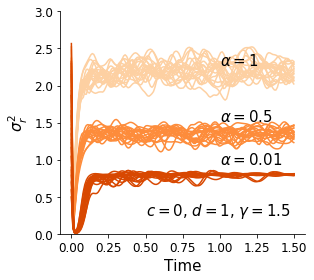

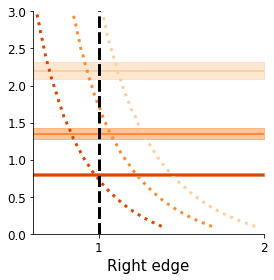

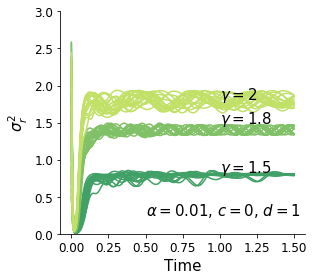

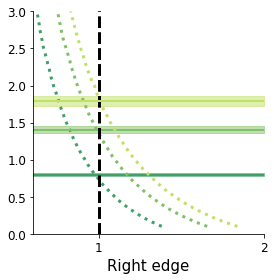

In [6]:
paras = [[1,0,1,1.5],[0.5,0,1,1.5],[0.01,0,1,1.5]]
color = plt.get_cmap("Oranges")
numerical_vars = []
numerical_vars_vars = []
for i,para in enumerate(paras):
    alpha,c,d,gamma=para
    all_var = np.loadtxt(datapath+"mean_activation1_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
    
    for j in range(len(all_var)):
        plt.plot(np.linspace(0,1.5,num=150),all_var[j],color=color((i+1)/4))
    plt.text(s=r"$\alpha=${}".format(alpha),x=1.0,y = all_var[0][-1]+0.15,fontsize=15,color="k")
    numerical_vars.append(np.average(all_var[:,100:149]))
    numerical_vars_vars.append(np.std(all_var[:,100:149]))
plt.ylim(0.0,3.0)
plt.xlabel(r"Time",fontsize=15)
plt.ylabel(r"$\sigma_r^2$",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax =plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.tight_layout()
ax.set_aspect(0.5)
plt.text(s=r"$c=${}, $d=${}, $\gamma=${}".format(c,d,gamma),x=0.5,y = 0.25,fontsize=15,color="k")
plt.savefig(figpath+"mean_activation1.pdf")
plt.show()

plt.clf()
paras = [[1,0,1,1.5],[0.5,0,1,1.5],[0.01,0,1,1.5]]
for i,para in enumerate(paras):
    alpha,c,d,gamma=para
    N=200000
    phip = lambda x: np.ones_like(x)-np.tanh(x)**2
    max3 = []
    var_all = np.linspace(0.1,3,num=50)
    for var in var_all:
        activation = np.sqrt(var)*np.random.randn(N)
        phips = phip(activation)
        rmax = gamma*np.sqrt(alpha*np.average(phips**2)+np.average(phips)**2)
        max3.append(rmax)
    plt.plot(max3,var_all,color=color((i+1)/4),linewidth=3,linestyle="dotted")
    plt.plot([1.0,1.0],[0.0,3.0],color="k",linewidth=3,linestyle="--")
    plt.plot([0.6,2],[numerical_vars[i],numerical_vars[i]],color=color((i+1)/4),linewidth=2)
    plt.fill_between([0.6,2],[numerical_vars[i]+numerical_vars_vars[i],numerical_vars[i]+numerical_vars_vars[i]],[numerical_vars[i]-numerical_vars_vars[i],numerical_vars[i]-numerical_vars_vars[i]],color=color((i+1)/4),alpha=0.5)
plt.ylim(0.0,3.0)
plt.xlim(0.6,2)
plt.xlabel(r"Right edge",fontsize=15)
# plt.ylabel(r"Var",fontsize=15)
plt.xticks([1,2],fontsize=12)
plt.yticks(fontsize=12)
ax =plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.set_aspect(0.45)
plt.tight_layout()
plt.savefig(figpath+"mean_activation2.pdf")
plt.show()

plt.clf()
color = plt.get_cmap("summer")
numerical_vars = []
numerical_vars_vars = []
for i,gamma in enumerate([1.5,1.8,2]):
    N = 4000
    alpha=0.01
    c = 0
    d = 1
    all_var = np.loadtxt(datapath+"mean_activation1_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
    
    for j in range(len(all_var)):
        plt.plot(np.linspace(0,1.5,num=150),all_var[j],color=color((i+1)/4))
    plt.text(s=r"$\gamma=${}".format(gamma),x=1.0,y = all_var[0][-1]+0.05,fontsize=15,color="k")
    numerical_vars.append(np.average(all_var[:,100:149]))
    numerical_vars_vars.append(np.std(all_var[:,100:149]))
plt.ylim(0.0,3.0)
plt.xlabel(r"Time",fontsize=15)
plt.ylabel(r"$\sigma_r^2$",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax =plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.tight_layout()
ax.set_aspect(0.5)
plt.text(s=r"$\alpha=${}, $c=${}, $d=${}".format(alpha,c,d),x=0.5,y = 0.25,fontsize=15,color="k")
plt.savefig(figpath+"mean_activation4.pdf")
plt.show()

plt.clf()
for i,gamma in enumerate([1.5,1.8,2]):
    alpha=0.01
    c=0
    d=1
    N=200000
    phip = lambda x: np.ones_like(x)-np.tanh(x)**2
    max3 = []
    var_all = np.linspace(0.1,3,num=50)
    for var in var_all:
        activation = np.sqrt(var)*np.random.randn(N)
        phips = phip(activation)
        rmax = gamma*np.sqrt(alpha*np.average(phips**2)+np.average(phips)**2)
        max3.append(rmax)
    plt.plot(max3,var_all,color=color((i+1)/4),linewidth=3,linestyle="dotted")
    plt.plot([1.0,1.0],[0.0,3.0],color="k",linewidth=3,linestyle="--")
    plt.plot([0.6,2],[numerical_vars[i],numerical_vars[i]],color=color((i+1)/4),linewidth=2)
    plt.fill_between([0.6,2],[numerical_vars[i]+numerical_vars_vars[i],numerical_vars[i]+numerical_vars_vars[i]],[numerical_vars[i]-numerical_vars_vars[i],numerical_vars[i]-numerical_vars_vars[i]],color=color((i+1)/4),alpha=0.5)
plt.ylim(0.0,3.0)
plt.xlim(0.6,2)
plt.xlabel(r"Right edge",fontsize=15)
# plt.ylabel(r"Var",fontsize=15)
plt.xticks([1,2],fontsize=12)
plt.yticks(fontsize=12)
ax =plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.set_aspect(0.45)
plt.tight_layout()
plt.savefig(figpath+"mean_activation5.pdf")
plt.show()

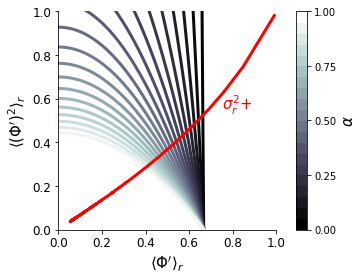

In [8]:
"""
A: <phip^2>
B：<phip>
"""
phip = lambda x: np.ones_like(x)-np.tanh(x)**2
import matplotlib as mpl
colors = color = plt.get_cmap("bone")
for i,alpha in enumerate(np.linspace(0.01,1,num=20)):
    gamma =1.5
    B = np.linspace(0,1,num=1000)
    A = (1.0/gamma**2-B**2)/alpha
    plt.plot(B,A,color=colors(i/20),linewidth=3)
    plt.xlim(0,1)
    plt.ylim(0,1)
N=100000
all_A = []
all_B = []
for var in np.linspace(0.01,200,num=1000):    
    activation = np.sqrt(var)*np.random.randn(N)
    phips = phip(activation)
    all_A.append(np.average(phips**2))
    all_B.append(np.average(phips))
plt.plot(all_B,all_A,color="r",linewidth=3)
ax = plt.gca()
ax.set_aspect(1)
# Normalizer 
norm = mpl.colors.Normalize(vmin=0.0, vmax=1) 
  
# creating ScalarMappable 
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('bone',20) , norm=norm) 
sm.set_array([]) 
  
cb=plt.colorbar(sm, ticks=np.linspace(0, 1, 5)) 
cb.set_label(label=r"$\alpha$",size=15)
plt.xlabel(r"$\langle\Phi^\prime\rangle_{r}$",fontsize=15)
plt.ylabel(r"$\langle(\Phi^\prime)^2\rangle_{r}$",fontsize=15)
plt.text(s=r"$\sigma_r^2$+",x=0.75,y=0.55,fontsize=15,color="r")
# plt.ylabel(r"Var",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.tight_layout()
plt.savefig(figpath+"mean_activation3.pdf")

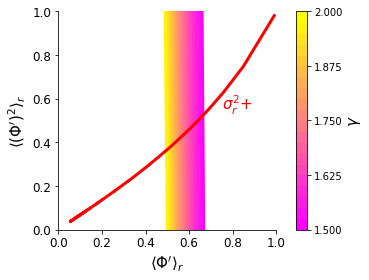

In [9]:
"""
A: <phip^2>
B：<phip>
"""
phip = lambda x: np.ones_like(x)-np.tanh(x)**2
import matplotlib as mpl
colors = color = plt.get_cmap("spring")
for i,gamma in enumerate(np.linspace(1.5,2,num=20)):
    alpha=0.01
    B = np.linspace(0,1,num=1000)
    A = (1.0/gamma**2-B**2)/alpha
    plt.plot(B,A,color=colors(i/20),linewidth=3)
    plt.xlim(0,1)
    plt.ylim(0,1)
N=100000
all_A = []
all_B = []
for var in np.linspace(0.01,200,num=1000):    
    activation = np.sqrt(var)*np.random.randn(N)
    phips = phip(activation)
    all_A.append(np.average(phips**2))
    all_B.append(np.average(phips))
plt.plot(all_B,all_A,color="r",linewidth=3)
ax = plt.gca()
ax.set_aspect(1)
# Normalizer 
norm = mpl.colors.Normalize(vmin=1.5, vmax=2) 
  
# creating ScalarMappable 
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('spring',20) , norm=norm) 
sm.set_array([]) 
  
cb=plt.colorbar(sm, ticks=np.linspace(1.5, 2, 5)) 
cb.set_label(label=r"$\gamma$",size=15)
plt.xlabel(r"$\langle\Phi^\prime\rangle_{r}$",fontsize=15)
plt.ylabel(r"$\langle(\Phi^\prime)^2\rangle_{r}$",fontsize=15)
plt.text(s=r"$\sigma_r^2$+",x=0.75,y=0.55,fontsize=15,color="r")
# plt.ylabel(r"Var",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.tight_layout()
plt.savefig(figpath+"mean_activation6.pdf")